In [2]:
import math
from sklearn.linear_model import LogisticRegression

In [3]:
import pandas as pd
import numpy as np

In [33]:
df=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
664,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q,0
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,0


In [34]:
df['FamilySize']=df['SibSp']+df['Parch']+1
df.head()
df2['FamilySize']=df2['SibSp']+df2['Parch']+1
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,3
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,1
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,4
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,1


In [35]:
df.dropna(subset=['Embarked'])
df2.dropna(subset=['Embarked'])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,3
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,1
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,4
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,1
...,...,...,...,...,...,...,...,...,...,...,...
218,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,2
219,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,1
220,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,2
221,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S,1


In [36]:
embarked_one_hot=pd.get_dummies(df['Embarked'],prefix='Embarked')
df=pd.concat([df,embarked_one_hot],axis=1)
df.head()
embarked_one_hot=pd.get_dummies(df2['Embarked'],prefix='Embarked')
df2=pd.concat([df2,embarked_one_hot],axis=1)
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,3,0,0,1
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,0,0,1
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,1,0,1,0
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,4,0,0,1
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,1,0,0,1


In [37]:
df['Cabin']=df['Cabin'].fillna('U')
df['Cabin']=df['Cabin'].apply(lambda x:x[0])
df2['Cabin']=df2['Cabin'].fillna('U')
df2['Cabin']=df2['Cabin'].apply(lambda x:x[0])

In [38]:
cabin_one_hot=pd.get_dummies(df['Cabin'],prefix='Cabin')
df=pd.concat([df,cabin_one_hot],axis=1)
df.columns
cabin_one_hot=pd.get_dummies(df2['Cabin'],prefix='Cabin')
df2=pd.concat([df2,cabin_one_hot],axis=1)
df2.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_U'],
      dtype='object')

In [13]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()

In [39]:
df['Title']=df['Name'].apply(get_title)
df2['Title']=df2['Name'].apply(get_title)

In [40]:
df['Title'].unique()
df2['Title'].unique()

array(['Master', 'Dr', 'Mr', 'Mrs', 'Miss', 'Col', 'Rev', 'the Countess',
       'Major'], dtype=object)

In [41]:
title_one_hot=pd.get_dummies(df['Title'],prefix='Title')
df=pd.concat([df,title_one_hot],axis=1)
title_one_hot=pd.get_dummies(df2['Title'],prefix='Title')
df2=pd.concat([df2,title_one_hot],axis=1)

In [42]:
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Title,Title_Col,Title_Dr,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_the Countess
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,U,S,...,Master,0,0,0,1,0,0,0,0,0
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D,S,...,Dr,0,1,0,0,0,0,0,0,0
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,U,Q,...,Mr,0,0,0,0,0,1,0,0,0
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,U,S,...,Mrs,0,0,0,0,0,0,1,0,0
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E,S,...,Mr,0,0,0,0,0,1,0,0,0


In [43]:
sex_one_hot=pd.get_dummies(df['Sex'],prefix='Sex')
df=pd.concat([df,sex_one_hot],axis=1)
sex_one_hot=pd.get_dummies(df2['Sex'],prefix='Sex')
df2=pd.concat([df2,sex_one_hot],axis=1)

In [48]:
age_median=df.groupby('Title')['Age'].median()
age_median2=df2.groupby('Title')['Age'].median()


In [20]:
def fill_age(x):
    for index,age in zip(age_median.index,age_median.values):
        if(x['Title']==index):
            return age
    

In [49]:
df['Age']=df.apply(lambda x:fill_age(x) if np.isnan(x['Age'])
else x['Age'],axis=1)
df2['Age']=df2.apply(lambda x:fill_age(x) if np.isnan(x['Age'])
else x['Age'],axis=1)

In [50]:
df.isnull().sum()
df2.dtypes


Pclass                  int64
Name                   object
Sex                    object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
FamilySize              int64
Embarked_C              uint8
Embarked_Q              uint8
Embarked_S              uint8
Cabin_A                 uint8
Cabin_B                 uint8
Cabin_C                 uint8
Cabin_D                 uint8
Cabin_E                 uint8
Cabin_F                 uint8
Cabin_U                 uint8
Title                  object
Title_Col               uint8
Title_Dr                uint8
Title_Major             uint8
Title_Master            uint8
Title_Miss              uint8
Title_Mr                uint8
Title_Mrs               uint8
Title_Rev               uint8
Title_the Countess      uint8
Sex_female              uint8
Sex_male                uint8
dtype: obj

In [51]:
df=df.drop(['Name','Sex','Ticket','Cabin','Embarked','Title'],axis=1)
df.dtypes
df2=df2.drop(['Name','Sex','Ticket','Cabin','Embarked','Title'],axis=1)
df2.dtypes

Pclass                  int64
Age                   float64
SibSp                   int64
Parch                   int64
Fare                  float64
FamilySize              int64
Embarked_C              uint8
Embarked_Q              uint8
Embarked_S              uint8
Cabin_A                 uint8
Cabin_B                 uint8
Cabin_C                 uint8
Cabin_D                 uint8
Cabin_E                 uint8
Cabin_F                 uint8
Cabin_U                 uint8
Title_Col               uint8
Title_Dr                uint8
Title_Major             uint8
Title_Master            uint8
Title_Miss              uint8
Title_Mr                uint8
Title_Mrs               uint8
Title_Rev               uint8
Title_the Countess      uint8
Sex_female              uint8
Sex_male                uint8
dtype: object

In [52]:
df=(df-df.min())/(df.max()-df.min())
df2=(df2-df2.min())/(df2.max()-df2.min())


In [58]:
df2.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Title_Dr,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_the Countess,Sex_female,Sex_male
0,0.5,0.107396,0.125,0.5,0.071731,0.2,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.688297,0.000,0.0,0.050610,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.419099,0.000,0.0,0.015103,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.334089,0.250,0.5,0.052700,0.3,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.504109,0.000,0.0,0.051310,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,FamilySize,Embarked_C,Embarked_Q,Embarked_S,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Sex_female,Sex_male
0,0.5,0.357116,0.125,0.000000,0.050749,1.0,0.1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.369721,0.000,0.000000,0.015713,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.483172,0.000,0.000000,0.050749,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.357116,0.000,0.666667,0.041136,0.0,0.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.306694,0.000,0.000000,0.013761,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
y=df['Survived'].values
x=df.drop(['Survived'],axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Sex_female,Sex_male
0,0.5,0.357116,0.125,0.000000,0.050749,0.1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.369721,0.000,0.000000,0.015713,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.483172,0.000,0.000000,0.050749,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.357116,0.000,0.666667,0.041136,0.4,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.306694,0.000,0.000000,0.013761,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.5,0.205849,0.000,0.000000,0.020495,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
664,1.0,0.369721,0.000,0.000000,0.015127,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
665,1.0,0.394933,0.000,0.000000,0.110272,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
666,1.0,0.268877,0.000,0.000000,0.019202,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=21, test_size=0.2)


In [72]:
clf = LogisticRegression()

In [73]:
clf.fit(X_train, y_train)

LogisticRegression()

In [74]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8445692883895131
0.8208955223880597


In [75]:
train_preds = clf.predict(X_train)

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, train_preds)

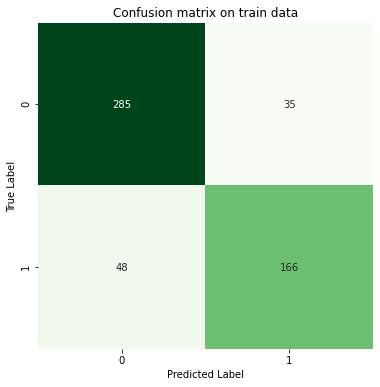

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()